
# 📈 Ridge Regression Demonstration

This notebook demonstrates **Ridge Regression (L2 Regularization)** and compares it with **Ordinary Least Squares (OLS)** regression.
We will see how Ridge helps when predictors are highly correlated (**multicollinearity**).


## 🔗 Data Preparation

We create a synthetic dataset with correlated predictors (similar to house size and number of rooms example).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Synthetic correlated dataset
np.random.seed(42)
m = 200
X1 = np.random.rand(m, 1) * 10
X2 = X1 + np.random.normal(0, 0.5, (m, 1))
X3 = np.random.rand(m, 1) * 5
y = 3*X1 + 2*X2 + 1.5*X3 + np.random.randn(m, 1) * 2

X = np.hstack([X1, X2, X3])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



## ⚙️ Model Training

We train three models:
- OLS (no regularization)
- Ridge Regression with small penalty (alpha=1)
- Ridge Regression with large penalty (alpha=100)


In [2]:

ols = LinearRegression()
ridge_small = Ridge(alpha=1.0)
ridge_large = Ridge(alpha=100.0)

ols.fit(X_train, y_train)
ridge_small.fit(X_train, y_train)
ridge_large.fit(X_train, y_train)

y_pred_ols = ols.predict(X_test)
y_pred_ridge_small = ridge_small.predict(X_test)
y_pred_ridge_large = ridge_large.predict(X_test)

print("OLS MSE:", mean_squared_error(y_test, y_pred_ols))
print("Ridge (alpha=1) MSE:", mean_squared_error(y_test, y_pred_ridge_small))
print("Ridge (alpha=100) MSE:", mean_squared_error(y_test, y_pred_ridge_large))


OLS MSE: 4.364231576896358
Ridge (alpha=1) MSE: 4.367955267149109
Ridge (alpha=100) MSE: 4.979301363676721



## 📊 Results and Bias-Variance Tradeoff

We compare Mean Squared Error (MSE) for each model.  
- OLS may overfit due to multicollinearity.  
- Ridge with small alpha improves generalization.  
- Ridge with very large alpha may underfit (too much bias).  


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


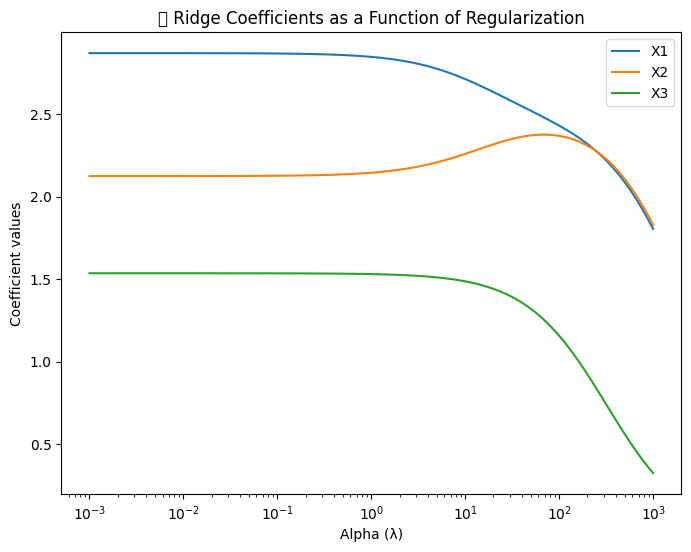

In [3]:

alphas = np.logspace(-3, 3, 100)
coefs = []
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=True)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_.ravel())

plt.figure(figsize=(8,6))
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('Alpha (λ)')
plt.ylabel('Coefficient values')
plt.title('📉 Ridge Coefficients as a Function of Regularization')
plt.legend(['X1','X2','X3'])
plt.show()
